# **Space X Falcon 9 First Stage Landing Outcome Prediction**


This notebook creates a machine learning pipeline to predict if the first stage of Falcon 9 will land successfully.


#### **Contents:**  

**Data Preprocessing** 
*   OneHot Encoding for outcome class
*   Standardize the data
*   Split data into training and test set


**Training Four Classification Models**   
* Logistic Regression
* SVM (Support Vector Machines)
* Decision Tree
* KNN (K-nearest Neighbors)

**Finetuning Hyperparameters**  

**Model Evaluation**  


#### Import Libraries and Define Functions

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

Function for plotting the confusion matrix.


In [34]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show() 

## Data Preprocessing


In [36]:
URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
data = pd.read_csv(URL1)

In [37]:
data.shape

(90, 18)

In [40]:
data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [42]:
URL2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'
X = pd.read_csv(URL2)

In [43]:
X.head()

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [46]:
X.shape

(90, 83)

**Create a NumPy array from the column <code>Class</code> in <code>data</code>.**

In [49]:
Y = data['Class'].to_numpy()
type(Y)
#

numpy.ndarray

**Standardize the data in <code>X</code>.**

In [51]:
# (sx: This normalizes values to have mean 0 and sd 1, and converts to numpy array)
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))  #

**Train-Test data split**


In [54]:
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.2, random_state=2)
print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)
#

Train set: (72, 83) (72,)
Test set: (18, 83) (18,)


we can see we only have 18 test samples.


In [56]:
Y_test.shape

(18,)

## Model Fitting and Evaluation


#### **<span style="color:royalblue;">(1). Logistic Regression**

Create a logistic regression object  then create a  GridSearchCV object  <code>logreg_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [58]:
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']} # l1 lasso l2 ridge
lr=LogisticRegression()

logreg_cv = GridSearchCV(lr, parameters, cv=10)
logreg_cv.fit(X_train, Y_train)

# 

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

We output the <code>GridSearchCV</code> object for logistic regression. We display the best parameters using the data attribute <code>best_params\_</code> and the accuracy on the validation data using the data attribute <code>best_score\_</code>.


In [60]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.8464285714285713


In [ ]:
# default criteria of GridSearch is R squared

Calculate the accuracy on the test data using the method <code>score</code>:


In [62]:
lr=LogisticRegression(C=0.01, penalty='l2', solver='lbfgs').fit(X_train, Y_train)
# // NEED TO FIT FIRST WITH BEST HYPERPARAMETERS SELECTED BY GRIDSEARCH ABOVE
# If try get scores before fitting --- NotFittedError: This LogisticRegression instance is not fitted yet. 
# Call 'fit' with appropriate arguments before using this estimator.

In [64]:
lr.score( X_test, Y_test)

0.8333333333333334

In [66]:
# // the above two steps is equivalent to the one code below, since logreg_cv is already fitted
logreg_cv.score( X_test, Y_test)

0.8333333333333334

Plot the confusion matrix:


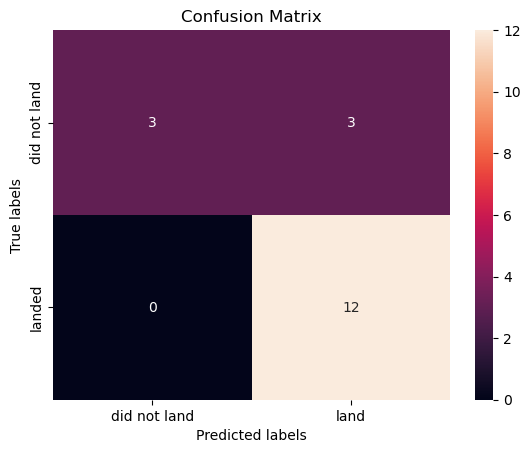

In [69]:
yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

Examining the confusion matrix, we see that logistic regression can distinguish between the different classes.  We see that the main error is false positives.

#### **<span style="color:royalblue;">(2). SVM**

Create a support vector machine object then  create a  <code>GridSearchCV</code> object  <code>svm_cv</code> with cv - 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [72]:
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()

In [74]:
svm_cv = GridSearchCV(svm, parameters, cv=10)
svm_cv.fit(X_train, Y_train)
#

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'gamma': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'kernel': ('linear', 'rbf', 'poly', 'rbf', 'sigmoid')})

In [76]:
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
accuracy : 0.8482142857142856


Calculate the accuracy on the test data using the method <code>score</code>:


In [78]:
svm_cv.score(X_test, Y_test)

0.8333333333333334

Plot the confusion matrix

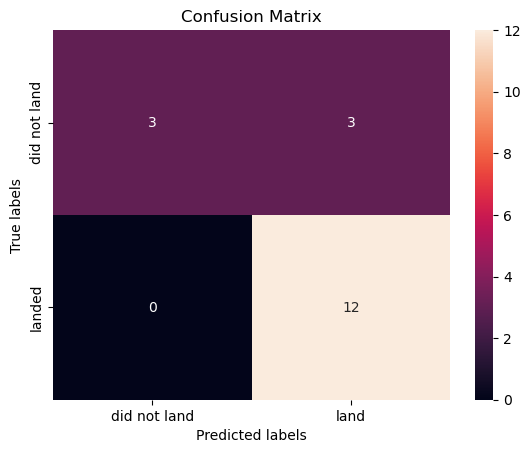

In [81]:
yhat=svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

#### **<span style="color:royalblue;">(3). Decision Tree**

Create a decision tree classifier object then  create a  <code>GridSearchCV</code> object  <code>tree_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [109]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier(max_features="sqrt")

In [123]:
import warnings
from sklearn.exceptions import DataConversionWarning

# Suppress all warnings
warnings.filterwarnings("ignore")

In [125]:
tree_cv = GridSearchCV(tree, parameters, cv=10)  

In [127]:
tree_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(max_features='sqrt'),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [129]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'splitter': 'random'}
accuracy : 0.8857142857142858


Calculate the accuracy of tree_cv on the test data using the method <code>score</code>:


In [131]:
tree_cv.score(X_test, Y_test)

0.8333333333333334

Plot the confusion matrix:

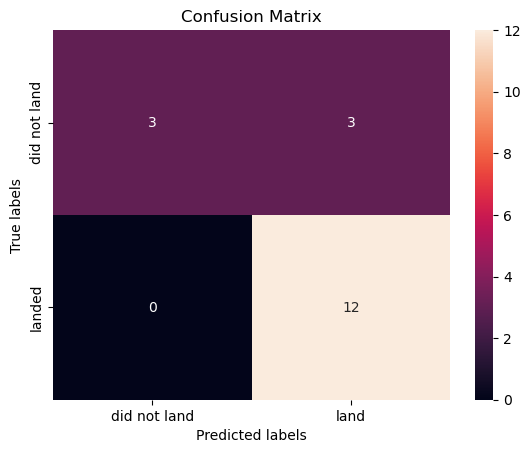

In [133]:
yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

#### **<span style="color:royalblue;">(4). KNN**

Create a k nearest neighbors object then  create a  <code>GridSearchCV</code> object  <code>knn_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [135]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()

In [137]:
knn_cv = GridSearchCV(KNN, parameters, cv=10)
knn_cv.fit(X_train, Y_train)
#

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

In [139]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}
accuracy : 0.8482142857142858


Calculate the accuracy of knn_cv on the test data using the method <code>score</code>:


In [141]:
knn_cv.score(X_test, Y_test)

0.8333333333333334

Plot the confusion matrix:

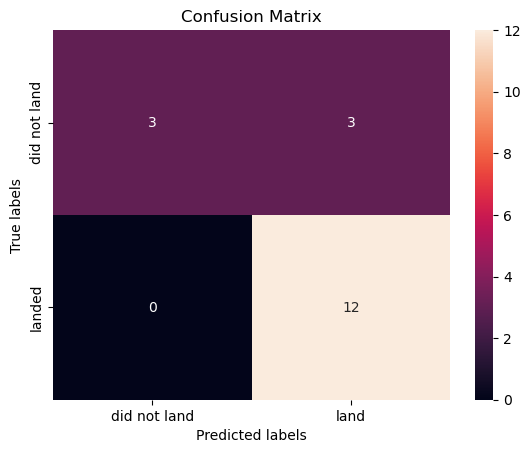

In [143]:
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## Comparing Model Performance

In [145]:
tab = {'LR':[logreg_cv.score(X_test, Y_test)],
     'SVM':[svm_cv.score(X_test, Y_test)],
     'Tree':[tree_cv.score(X_test, Y_test)],
     'KNN':[knn_cv.score(X_test, Y_test)]}
Report = pd.DataFrame(data=tab, index = ['Accuracy Score'])
Report

,LR,SVM,Tree,KNN
Accuracy Score,0.833333,0.833333,0.833333,0.833333


In [147]:
tab2 ={'Model': ['LR', 'SVM', 'Tree', 'KNN'], 
       'Score':[0.833333, 0.833333, 0.833333, 0.833333]} 
  
df = pd.DataFrame.from_dict(tab2)  
scores = df.set_index('Model')


Text(0.5, 1.0, 'Accuracy Scores for All Models')

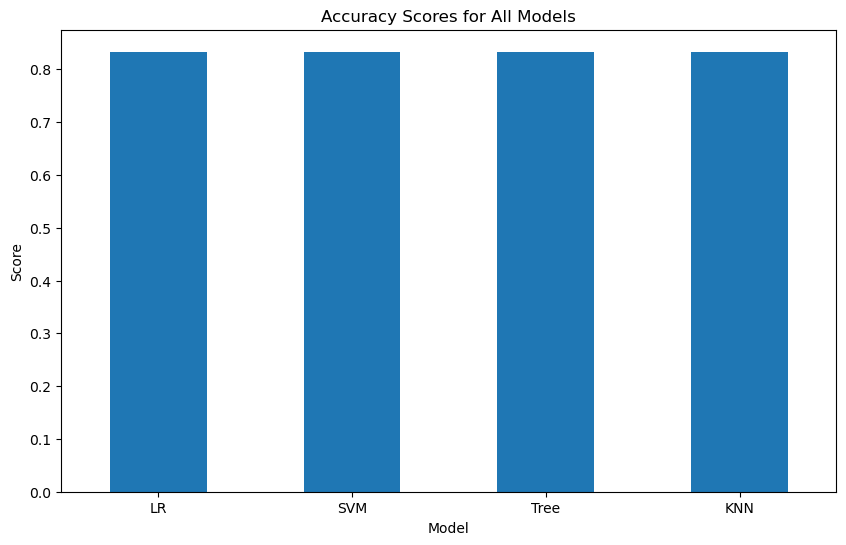

In [149]:
scores.plot(kind='bar', figsize=(10,6), rot=0, legend=None)
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Accuracy Scores for All Models')

All four models have very similar accuracy based on the test dataset.